In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Load the dataset
tf.keras provides a set of convenience functions for loading well-known datasets. Each of these convenience functions does the following:

Loads both the training set and the test set.
Separates each set into features and labels.
The relevant convenience function for MNIST is called mnist.load_data():

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

Notice that mnist.load_data() returned four separate values:

x_train contains the training set's features.
y_train contains the training set's labels.
x_test contains the test set's features.
y_test contains the test set's labels.
Note: The MNIST .csv training set is already shuffled.

# View the dataset
The .csv file for the California Housing Dataset contains column names (for example, latitude, longitude, population). By contrast, the .csv file for MNIST does not contain column names. Instead of column names, you use ordinal numbers to access different subsets of the MNIST dataset. In fact, it is probably best to think of x_train and x_test as three-dimensional NumPy arrays:

In [3]:
x_train[10]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  42, 118,
        219, 166, 118, 118,   6,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 103, 242, 254,
        254, 254, 254, 254,  66,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

# Alternatively, you can call matplotlib.pyplot.imshow to interpret the preceding numeric array as an image.

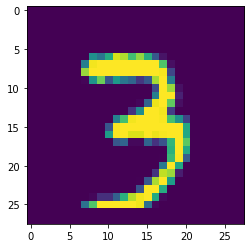

In [4]:
plt.imshow(x_train[2917])

In [5]:
# Output row #10 of example #2917.
x_train[2917][10]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,  58, 254, 216,  11,   0,   0,   0,   0,   0,   0,
         0,   0], dtype=uint8)

In [6]:
# Output pixel #16 of row #10 of example #2900.
x_train[2917][10][16]

58

# Task 1: Normalize feature values
Complete the following code cell to map each feature value from its current representation (an integer between 0 and 255) to a floating-point value between 0 and 1.0. Store the floating-point values in x_train_normalized and x_test_normalized.

In [7]:
x_train_normalized = x_train/255.0
x_test_normalized = x_test/255.0
print(x_train_normalized[2900][10]) # Output a normalized row

[0.         0.         0.         0.         0.         0.
 0.         0.55294118 1.         0.66666667 0.11372549 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]


# Create a deep neural net model
The create_model function defines the topography of the deep neural net, specifying the following:

The number of layers in the deep neural net.
The number of nodes in each layer.
Any regularization layers.
The create_model function also defines the activation function of each layer. The activation function of the output layer is softmax, which will yield 10 different outputs for each example. Each of the 10 outputs provides the probability that the input example is a certain digit.

Note: Unlike several of the recent Colabs, this exercise does not define feature columns or a feature layer. Instead, the model will train on the NumPy array.

In [11]:
def create_model(learning_rate):#here feature layer will not be used like other exercises
    model = tf.keras.Sequential()
    
    # The features are stored in a two-dimensional 28X28 array. 
  # Flatten that two-dimensional array into a a one-dimensional 
  # 784-element array.
    model.add(tf.keras.layers.Flatten(input_shape = (28, 28)))
    
    # Define the first hidden layer.   
    model.add(tf.keras.layers.Dense(units = 32, activation = "relu"))
    
    #Define a Deopout regulization layer
    model.add(tf.keras.layers.Dropout(rate =0.2))
    
    # Define the output layer. The units parameter is set to 10 because
  # the model must choose among 10 possible output values (representing
  # the digits from 0 to 9, inclusive).
  #
  # Don't change this layer.
    model.add(tf.keras.layers.Dense(units = 32, activation = "softmax"))
    
    # Construct the layers into a model that TensorFlow can execute.  
  # Notice that the loss function for multi-class classification
  # is different than the loss function for binary classification.  
    
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate), loss="sparse_categorical_crossentropy",metrics=["accuracy"])
    
    return model

#Now to Train Model
def train_model(model, train_features, train_label ,epochs, batch_size,validation_split = 0.1):
    history = model.fit(x= train_features, y = train_label, epochs = epochs, batch_size = batch_size ,validation_split= validation_split)
     # To track the progression of training, gather a snapshot
  # of the model's metrics at each epoch. 
    epochs = history.epoch
    hist = pd.DataFrame(history.history)
    
    return epochs, hist
    

# Define a plotting function
The following function plots an accuracy curve:

In [14]:
def plot_curve(epochs, hist, list_of_metrices):
    plt.figure()
    plt.xlabel("Epoch")
    plt.ylabel("Value")
    
    for i in list_of_metrices:
        x = hist[i]
        plt.plot(epochs[1:], x[1: ], label = i)
    
    plt.legend()

# Invoke the previous functions
Run the following code cell to invoke the preceding functions and actually train the model on the training set.

Note: Due to several factors (for example, more examples and a more complex neural network) training MNIST might take longer than training the California Housing Dataset. Be patient.

Epoch 1/50
12/12 [==============================] - 1s 33ms/step - loss: 2.5169 - accuracy: 0.2399 - val_loss: 1.5399 - val_accuracy: 0.6104
Epoch 2/50
12/12 [==============================] - 0s 23ms/step - loss: 1.3667 - accuracy: 0.5882 - val_loss: 0.8263 - val_accuracy: 0.8034
Epoch 3/50
12/12 [==============================] - 0s 23ms/step - loss: 0.9026 - accuracy: 0.7241 - val_loss: 0.5680 - val_accuracy: 0.8547
Epoch 4/50
12/12 [==============================] - 0s 25ms/step - loss: 0.6924 - accuracy: 0.7925 - val_loss: 0.4490 - val_accuracy: 0.8818
Epoch 5/50
12/12 [==============================] - 0s 24ms/step - loss: 0.5796 - accuracy: 0.8279 - val_loss: 0.3843 - val_accuracy: 0.8974
Epoch 6/50
12/12 [==============================] - 0s 23ms/step - loss: 0.5123 - accuracy: 0.8475 - val_loss: 0.3451 - val_accuracy: 0.9047
Epoch 7/50
12/12 [==============================] - 0s 24ms/step - loss: 0.4667 - accuracy: 0.8641 - val_loss: 0.3177 - val_accuracy: 0.9128
Epoch 8/50
12

[0.16085460782051086, 0.9550999999046326]

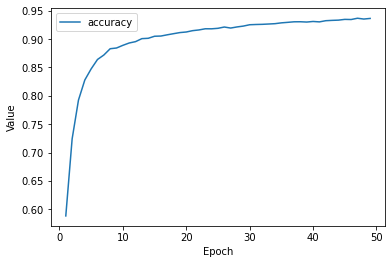

In [15]:
#The hypermeters
learning_rate = 0.003
epochs = 50
batch_size = 4000
validation_split = 0.2

#Creating the model

my_model = create_model(learning_rate)

#training The model

epochs, hist = train_model(my_model, x_train_normalized, y_train, epochs, batch_size, validation_split)

metrics = ["accuracy"]
plot_curve(epochs, hist, metrics)

#Evaluatng against Test Set
print("\nEvaluating Against Test Set")
my_model.evaluate(x=x_test_normalized, y=y_test, batch_size=batch_size)

# Task 2: Optimize the model
Experiment with the following:

number of hidden layers
number of nodes in each layer
dropout regularization rate
What trends did you discover? Can you reach at least 98% accuracy against the test set?

In [ ]:
# It would take much too long to experiment 
# fully with topography and dropout regularization 
# rate. In the real world, you would
# also experiment with learning rate, batch size, 
# and number of epochs.  Since you only have a 
# few minutes, searching for trends can be helpful.
# Here is what we discovered:
#   * Adding more nodes (at least until 256 nodes) 
#     to the first hidden layer improved accuracy.
#   * Adding a second hidden layer generally 
#     improved accuracy.
#   * When the model contains a lot of nodes, 
#     the model overfits unless the dropout rate 
#     is at least 0.5. 

# We reached 98% test accuracy with the 
# following configuration:
#   * One hidden layer of 256 nodes; no second hidden layer.
#   * dropout regularization rate of 0.4

# We reached 98.2% test accuracy with the 
# following configuration:
#   * First hidden layer of 256 nodes; 
#     second hidden layer of 128 nodes.
#   * dropout regularization rate of 0.2
